Shape: (150, 5)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Summary Stats:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


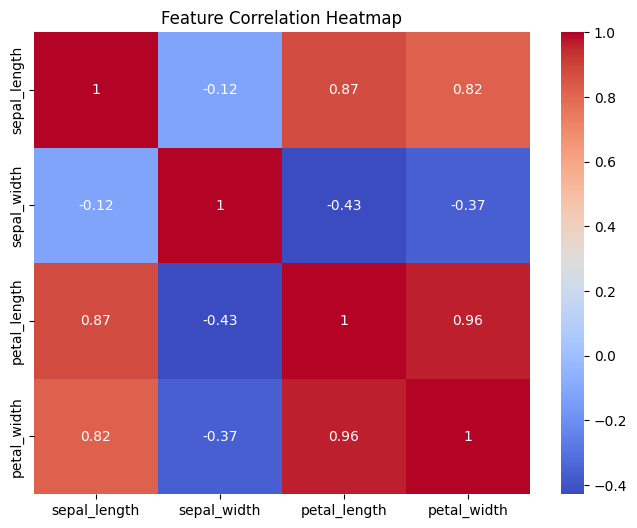

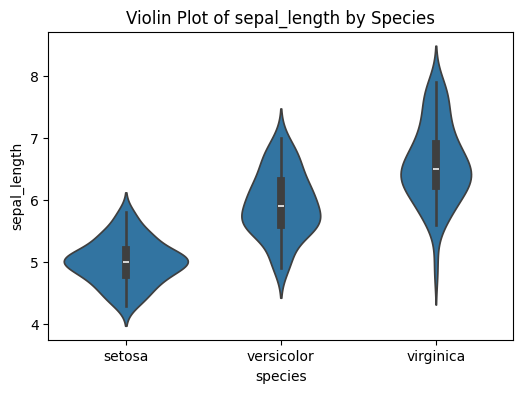

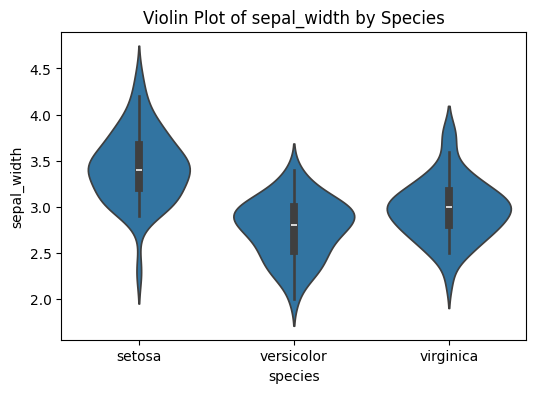

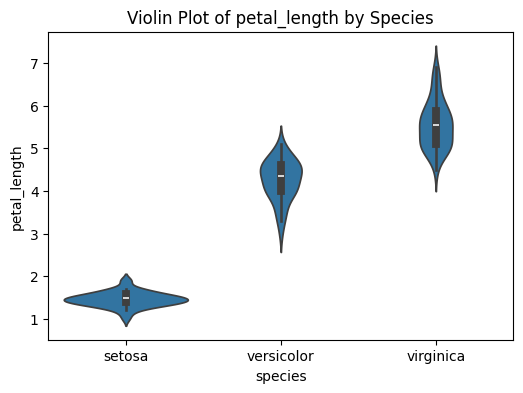

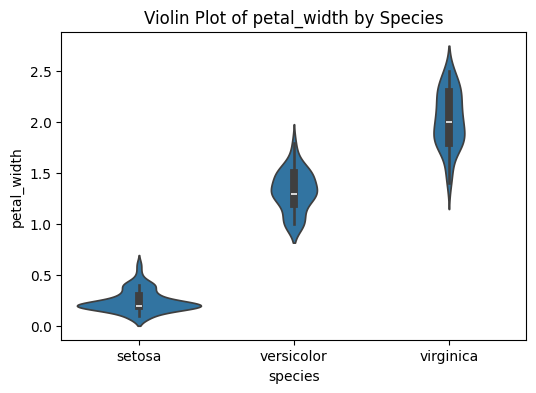

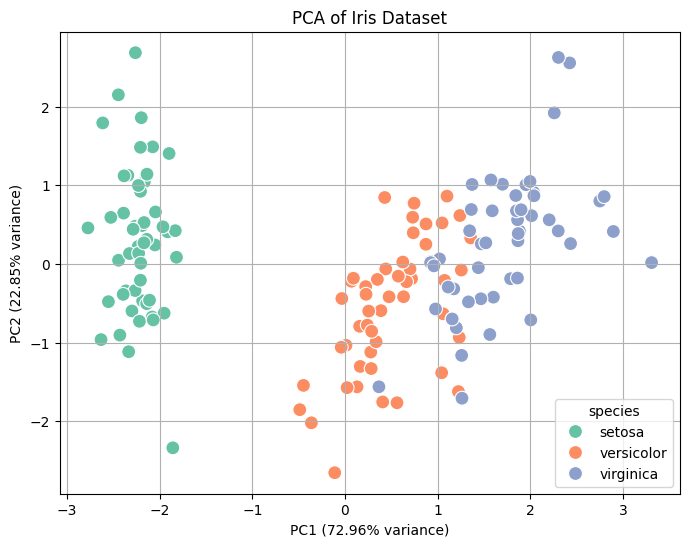

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import seaborn as sns  # For visualizations
import matplotlib.pyplot as plt  # For plotting
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.preprocessing import StandardScaler  # For feature scaling
import numpy as np  # For numerical operations

# Load the Iris dataset directly from seaborn's built-in collection
iris = sns.load_dataset('iris')

# Print basic info about the dataset
print("Shape:", iris.shape)  # (150, 5)
print("Columns:", iris.columns.tolist())  # List of feature names
print("\nSummary Stats:\n", iris.describe())  # Descriptive statistics (mean, std, etc.)
print("\nMissing Values:\n", iris.isnull().sum())  # Check for missing values

# Plot a heatmap to visualize feature correlations
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(iris.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')  # Drop categorical column and compute correlation
plt.title("Feature Correlation Heatmap")  # Title
plt.show()  # Display plot

# Plot violin plots to see feature distributions across species
for col in iris.columns[:-1]:  # Iterate through all numeric features
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.violinplot(x='species', y=col, data=iris)  # Show distribution by class
    plt.title(f'Violin Plot of {col} by Species')  # Title for each feature
    plt.show()  # Display each plot

# ------------------- PCA Section -------------------

# Extract only numerical features (drop species column)
features = iris.drop('species', axis=1)

# Standardize the features to zero mean and unit variance
scaler = StandardScaler()  # Initialize scaler
scaled_features = scaler.fit_transform(features)  # Fit and transform

# Apply Principal Component Analysis to reduce to 2 components
pca = PCA(n_components=2)  # Set number of components to 2
pca_result = pca.fit_transform(scaled_features)  # Apply PCA

# Convert PCA results into a DataFrame and add species labels back
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])  # New 2D feature space
pca_df['species'] = iris['species']  # Add label column for color-coding

# Scatter plot of PCA result colored by species
plt.figure(figsize=(8, 6))  # Set size
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='Set2', s=100)  # Plot PC1 vs PC2

# Add axis labels with explained variance
plt.title('PCA of Iris Dataset')  # Plot title
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')  # PC1 variance explained
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')  # PC2 variance explained
plt.grid(True)  # Add grid
plt.show()  # Show final plot
